# Introduction
This is a basic Fashion MNIST classification experiment, based on the code from https://www.kaggle.com/code/dansbecker/deep-learning-from-scratch-daily

![Imgur](https://i.imgur.com/GyXOnSB.png)

# Data [pre]processing

In [4]:
!unzip fashion-mnist_test.csv.zip

Archive:  fashion-mnist_test.csv.zip
  inflating: fashion-mnist_test.csv  


In [15]:
!unzip fashion-mnist_train.csv.zip

Archive:  fashion-mnist_train.csv.zip
  inflating: fashion-mnist_train.csv  


In [12]:
!unzip train-images-idx3-ubyte.zip

Archive:  train-images-idx3-ubyte.zip
  inflating: train-images-idx3-ubyte  


In [13]:
!unzip t10k-images-idx3-ubyte.zip

Archive:  t10k-images-idx3-ubyte.zip
  inflating: t10k-images-idx3-ubyte  


# Data Preparation
This code was already supplied

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = "fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)


# 1) Start the model
Create a `Sequential` model called `fashion_model`. Don't add layers yet.

In [32]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

fashion_model = Sequential()

# 2) Add the first layer

Add the first `Conv2D` layer to `fashion_model`. It should have 12 filters, a kernel_size of 3 and the `relu` activation function. The first layer always requires that you specify the `input_shape`.  We have saved the number of rows and columns to the variables `img_rows` and `img_cols` respectively, so the input shape in this case is `(img_rows, img_cols, 1)`.

In [33]:
# Your code here

fashion_model.add(Conv2D(12, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))

# 3) Add the remaining layers

1. Add 2 more convolutional (`Conv2D layers`) with 20 filters each, 'relu' activation, and a kernel size of 3. Follow that with a `Flatten` layer, and then a `Dense` layer with 100 neurons.
2. Add your prediction layer to `fashion_model`.  This is a `Dense` layer.  We alrady have a variable called `num_classes`.  Use this variable when specifying the number of nodes in this layer. The activation should be `softmax` (or you will have problems later).

In [34]:
# Your code here

fashion_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
fashion_model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
fashion_model.add(Conv2D(20, kernel_size=3, activation='relu'))
fashion_model.add(Conv2D(20, kernel_size=3, activation='relu'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Conv2D(20, kernel_size=3, activation='relu'))
fashion_model.add(Conv2D(20, kernel_size=3, activation='relu'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())

fashion_model.add(Dense(100, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))


# 4) Compile Your Model
Compile fashion_model with the `compile` method.  Specify the following arguments:
1. `loss = "categorical_crossentropy"`
2. `optimizer = 'adam'`
3. `metrics = ['accuracy']`

In [38]:
# Your code to compile the model in this cell

fashion_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

# 5) Plot the model

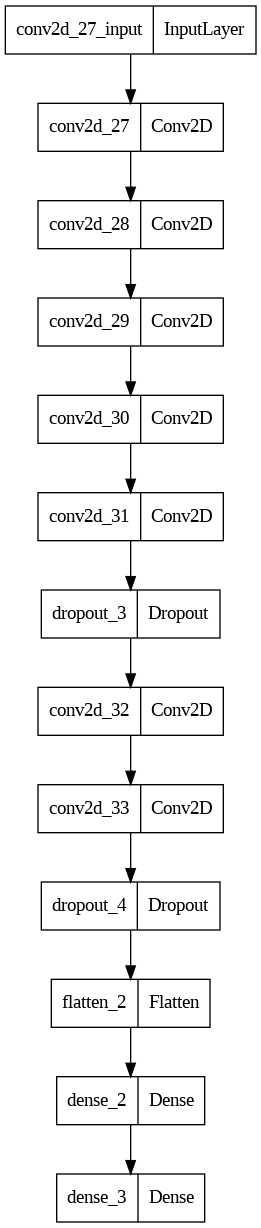

In [37]:
from keras.utils import plot_model

plot_model(fashion_model)

# 6) Fit The Model
Run the command `fashion_model.fit`. The arguments you will use are
1. The data used to fit the model. First comes the data holding the images, and second is the data with the class labels to be predicted. Look at the first code cell (which was supplied to you) where we called `prep_data` to find the variable names for these.
2. `batch_size = 100`
3. `epochs = 4`
4. `validation_split = 0.2`

When you run this command, you can watch your model start improving.  You will see validation accuracies after each epoch.

In [40]:
# Your code to fit the model here
history = fashion_model.fit(x, y,
          batch_size=128,
          epochs=2,
          validation_split = 0.2)

Epoch 1/2
375/375 [==============================] - 160s 427ms/step - loss: 0.3555 - accuracy: 0.8692 - val_loss: 0.3273 - val_accuracy: 0.8804
Epoch 2/2
375/375 [==============================] - 161s 429ms/step - loss: 0.3091 - accuracy: 0.8864 - val_loss: 0.2859 - val_accuracy: 0.8988


# 6) Evaluate the performance

In [41]:
# Evaluate the model on a separate dataset
evaluation = fashion_model.evaluate(x, y)

# Print the evaluation results
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

1875/1875 [==============================] - 62s 33ms/step - loss: 0.2603 - accuracy: 0.9048
Loss: 0.2602522075176239
Accuracy: 0.9047999978065491


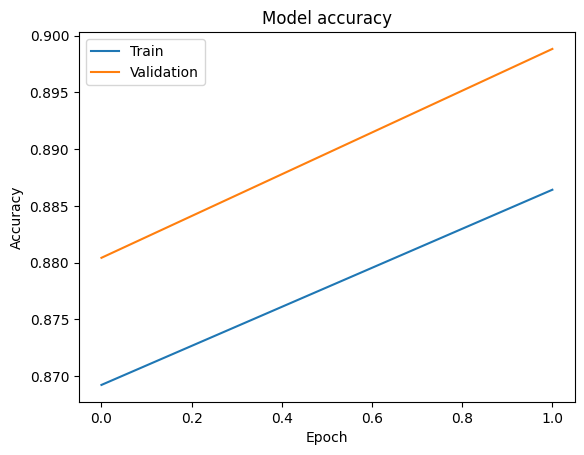

In [43]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()